# Testing queries to create a time series

In [1]:
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import pandas as pd
from models.realtime import VehiclePosition

In [2]:
import configparser

# Configuration file
config = configparser.ConfigParser()
config.read("./gtfs2series.cfg")

# Database information
system = config.get("database", "system")
host = config.get("database", "host")
port = config.getint("database", "port")
name = config.get("database", "name")
user = config.get("database", "user")
password = config.get("database", "password")

In [3]:
# Create database engine and make session
engine = create_engine(f"{system}://{user}:{password}@{host}:{port}/{name}")
Session = sessionmaker(bind=engine)
session = Session()

In [4]:
# Query the database for vehicle_trip_routeId = "Orange"
route = (
    session.query(VehiclePosition)
    .filter(VehiclePosition.vehicle_trip_routeId == "39")
    .filter(VehiclePosition.vehicle_trip_directionId == 1)
)

In [5]:
df = pd.read_sql(route.statement, route.session.bind)

In [6]:
time_series = df[["vehicle_timestamp", "vehicle_occupancyPercentage"]].set_index("vehicle_timestamp")

In [7]:
time_series.head()

,vehicle_occupancyPercentage
vehicle_timestamp,
2023-11-19 22:16:16,20.0
2023-11-19 22:16:19,20.0
2023-11-19 22:16:29,20.0
2023-11-19 22:16:45,20.0
2023-11-19 22:16:57,20.0


<Axes: xlabel='vehicle_timestamp'>

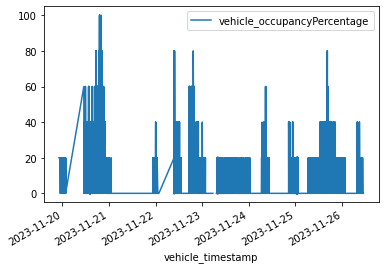

In [8]:
time_series.plot()

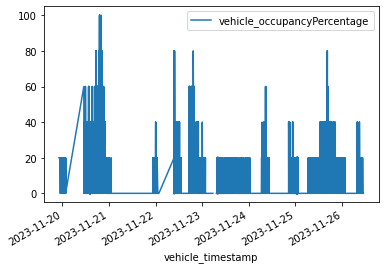

In [9]:
# Save image
fig = time_series.plot().get_figure()
fig.savefig("test.jpg")